# Data Visualization
#### Visualizing relationships between features using the ALSL dataset
Mathias Galvan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


acc_seat = pd.read_csv('/Users/galvanm/python/BucksHackathon25/BucksBusinessObjectives/BucksDatasets/ALSL.csv')
acc = pd.read_csv('/Users/galvanm/python/BucksHackathon25/BucksBusinessObjectives/BucksDatasets/AccountLevel.csv')

acc_seat.columns

Index(['Season_x', 'AccountNumber', 'SingleGameTickets', 'PartialPlanTickets',
       'GroupTickets', 'STM', 'AvgSpend', 'GamesAttended', 'FanSegment',
       'DistanceToArena', 'BasketballPropensity', 'SocialMediaEngagement',
       'Season_y', 'Game', 'GameDate', 'GameTier'],
      dtype='object')

##### AccountLevel x SeatLevel


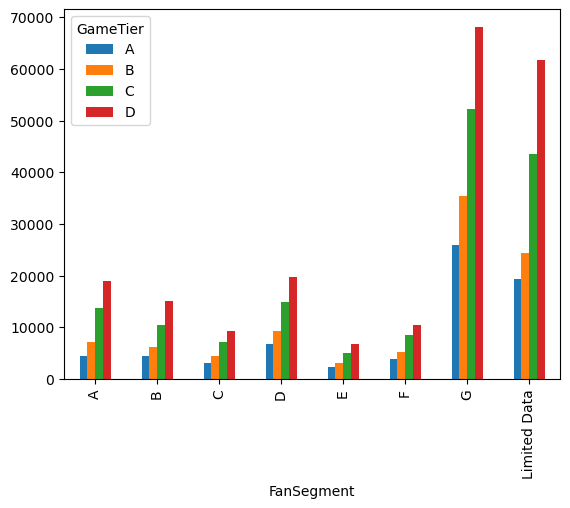

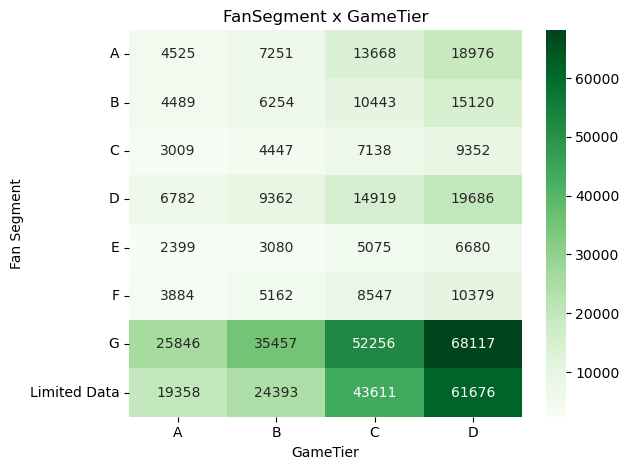

In [5]:
f = acc_seat.groupby(['FanSegment', 'GameTier']).size().unstack()

f.plot(kind='bar')
plt.show()

ct = pd.crosstab(acc_seat['FanSegment'], acc_seat['GameTier'])

sns.heatmap(ct, annot=True, fmt='d', cmap='Greens')
plt.title('FanSegment x GameTier')
plt.xlabel('GameTier')
plt.ylabel('Fan Segment')
plt.tight_layout()
plt.show()

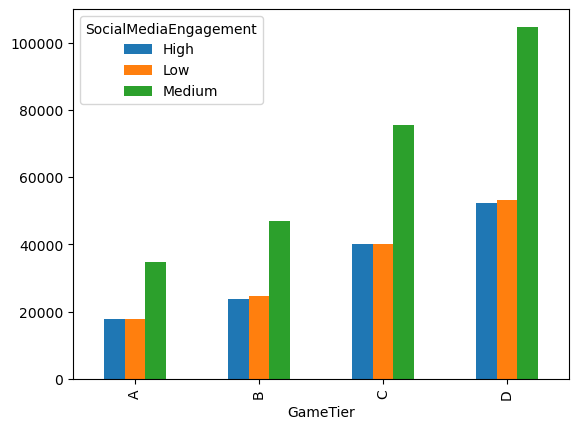

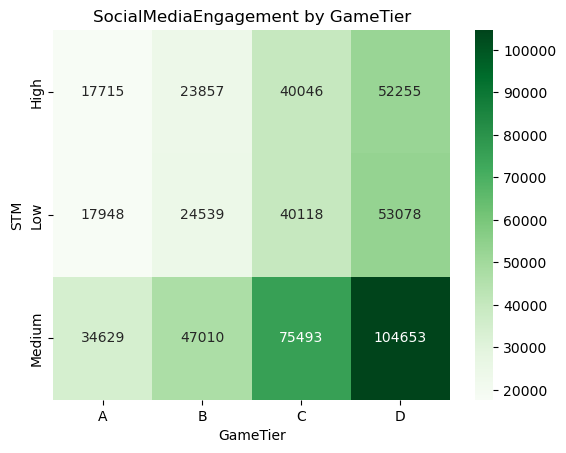

In [6]:
e = acc_seat.groupby(['GameTier', 'SocialMediaEngagement']).size().unstack()
e.plot(kind='bar')
plt.show()

ct = pd.crosstab(acc_seat['SocialMediaEngagement'], acc_seat['GameTier'])

sns.heatmap(ct, annot=True, fmt='d', cmap='Greens')
plt.title('SocialMediaEngagement by GameTier')
plt.xlabel('GameTier')
plt.ylabel('STM')
plt.show()

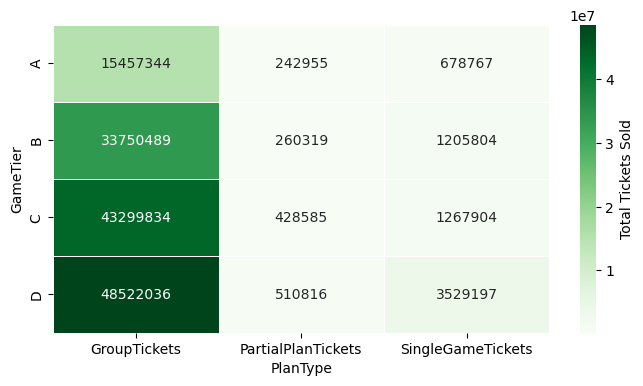

In [7]:
ticket_cols = ['SingleGameTickets','PartialPlanTickets','GroupTickets']

# 1) Melt into long form
df_long = acc_seat.melt( id_vars='GameTier', value_vars=ticket_cols, var_name='PlanType', value_name='Count')

# (Optional) if you only want to count the accounts who purchased ANY of that plan:
df_long = df_long[df_long['Count'] > 0]

# 2) Pivot back to a simple 2D table
#    – here we sum the total tickets sold of each plan in each tier
table = df_long.pivot_table(index='GameTier', columns='PlanType', values='Count', aggfunc='sum', fill_value=0)

# 3) Draw a clean heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(table, annot=True, fmt='d', cmap='Greens', linewidths=0.5, cbar_kws={'label': 'Total Tickets Sold'})
plt.show()

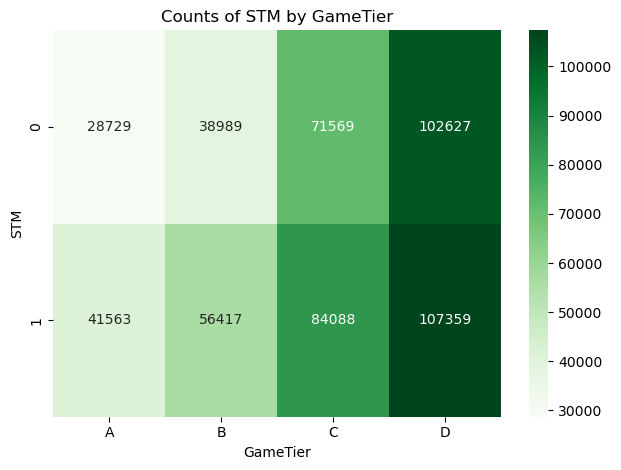

In [8]:
ct = pd.crosstab(acc_seat['STM'], acc_seat['GameTier'])

sns.heatmap(ct, annot=True, fmt='d', cmap='Greens')
plt.title('Counts of STM by GameTier')
plt.xlabel('GameTier')
plt.ylabel('STM')
plt.tight_layout()
plt.show()

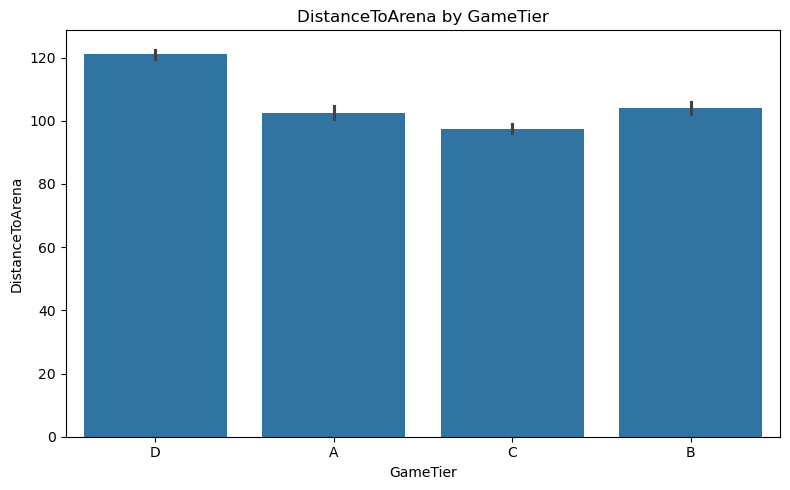

In [31]:
sns.barplot(x='GameTier', y='DistanceToArena', data=acc_seat)
plt.title('DistanceToArena by GameTier')
plt.xlabel('GameTier')
plt.ylabel('DistanceToArena')
plt.tight_layout()
plt.show()

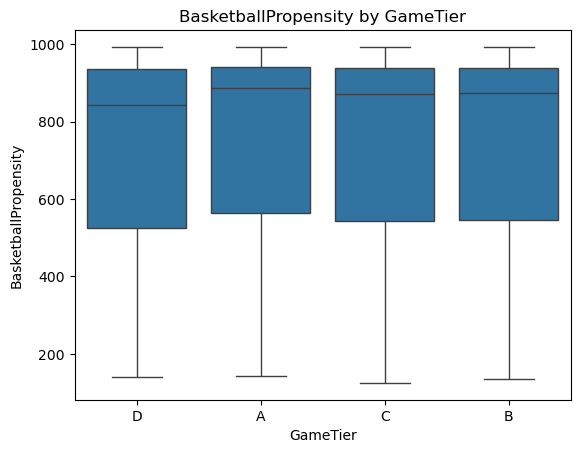

In [10]:
sns.boxplot(x='GameTier', y='BasketballPropensity', data=acc_seat)
plt.title('BasketballPropensity by GameTier')
plt.xlabel('GameTier')
plt.ylabel('BasketballPropensity')

plt.show()


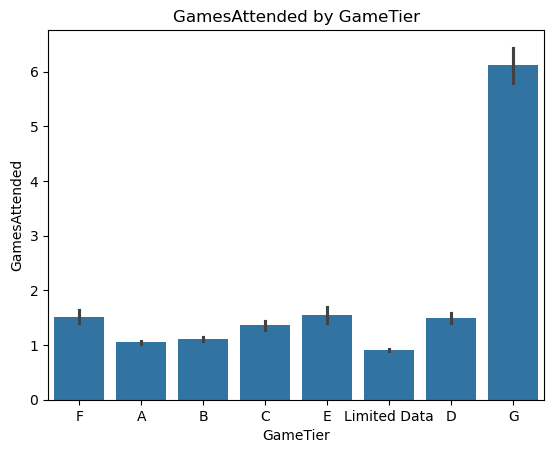

In [33]:
sns.barplot(x='FanSegment', y='GamesAttended', data=acc)
plt.title('GamesAttended by GameTier')
plt.xlabel('GameTier')
plt.ylabel('GamesAttended')

plt.show()